In [1]:
# Problem Statement
'''Make a model to predict wheter the news is fake or not. We will be using NLTK library to perform the same.
We will also be using data cleaning libs such as regex and sklearn.'''

'Make a model to predict wheter the news is fake or not. We will be using NLTK library to perform the same.\nWe will also be using data cleaning libs such as regex and sklearn.'

In [2]:
# importing libs to get started
import numpy as np
import pandas as pd
news_df=pd.read_csv('train.csv')

In [3]:
news_df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Dropping NaN values and re-indexing missing indexes
news_df=news_df.dropna()
news_df.reset_index(inplace=True)

In [5]:
# Splitting into X and Y data sets
X=news_df.drop(['label','id'],axis='columns')
Y=news_df['label']

In [6]:
X

,index,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [7]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [8]:
len(X)

18285

In [9]:
# Data Cleaning and Pre-Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(X)):
    review=re.sub('[^a-zA-Z]',' ',X['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [10]:
# Apllying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
x.shape

(18285, 5000)

In [13]:
# Splitting data into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,Y_train.shape

((14628, 5000), (14628,))

In [15]:
# Getting top 20 names of features 
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [16]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [17]:
df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [18]:
df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14625,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Creating our model
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

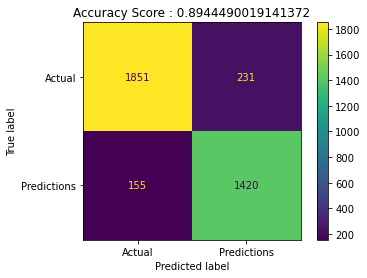

In [20]:
# Predicting outputs and printing a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
predictions=nb.predict(X_test)
score=accuracy_score(Y_test,predictions)
cm=confusion_matrix(Y_test,predictions)
cmd=ConfusionMatrixDisplay(cm,an)
cmd.plot()
plt.title(f'Accuracy Score : {score}')
plt.show()